In [1]:
# !pip install pandas
import pandas as pd

# arquivo muito grande para fazer upload no github
# uri = https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr/versions/1?resource=download
df = pd.read_csv('imdb-reviews-pt-br.csv')
df.head(5)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [2]:
# !pip install scikit-learn
from sklearn.model_selection import train_test_split

# divide os dados para treino do modelo e teste desse modelo
treino, teste, classe_treino, classe_teste = train_test_split(df.text_pt, df.sentiment, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
# esse modelo vai calcular a possibilidade de determinada classificação - positivo ou negativo

# modelo
regressao_logistica = LogisticRegression()
# treino do modelo com os dados
regressao_logistica.fit(treino, classe_treino)
# teste da qualidade do modelo
acuracia = regressao_logistica.score(teste, classe_teste)
# por motivos óbvios, o modelo não é capaz de interpretar o texto

In [4]:
print(df.sentiment.value_counts())
    # checar se os valores estão balanceados para criar um modelo de classificação

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [4]:
# padronizando a coluna Sentiment
classificacao = df['sentiment'].replace(['neg', 'pos'], [0,1])
df['classificacao'] = classificacao

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# vetorizar o corpus em um vetor bag of words
vetorizar = CountVectorizer(lowercase=False, max_features=50)
    # max_features define o tamanho da matriz escolhendo só as n palavras que mais aparecem
bag_of_words = vetorizar.fit_transform(df.text_pt)

dicionario = vetorizar.get_feature_names_out()

# recebe uma matriz esparsa - de zeros e NaN - e retorna um DF
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=dicionario)

In [6]:
def classificar_txt(texto, coluna_txt, coluna_classe):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_txt])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classe], random_state=42)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

classificar_txt(df, 'text_pt', 'classificacao')
    

0.6583097452486858

In [7]:
#!pip install wordcloud

#%matplotlib inline
from wordcloud import WordCloud

# junta todas as frases - separadas como valores - numa array, para, com o join, juntar todas e separá-las pelo " "
todas_palavras = " ".join([texto for texto in df.text_pt])

nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    # collocations = tira os bigramas ("palavras duplas", como 'este filme') e filtra só palavras "soltas"

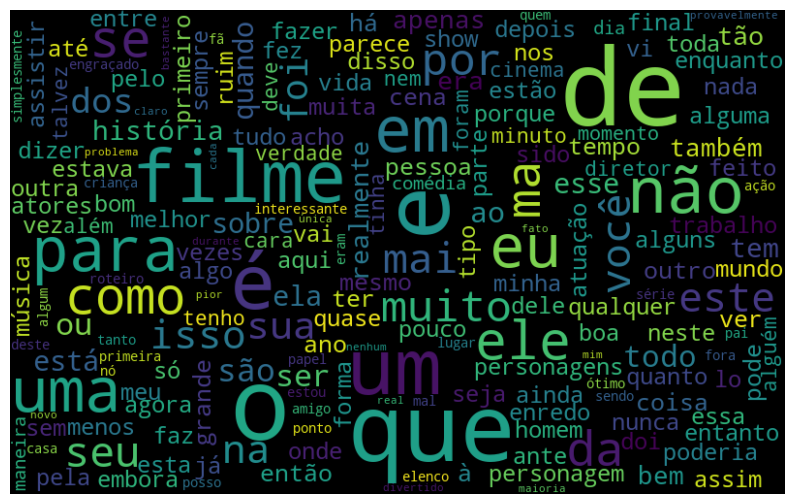

In [8]:
import matplotlib.pyplot as plt

# plotando as palavras mais frequentes para entender melhor o conjunto de dados
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
    # interpolation = melhora a qualidade
plt.axis("off")
plt.show()

In [9]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query('classificacao == 1')
    todas_palavras = " ".join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query('classificacao == 0')
    todas_palavras = " ".join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

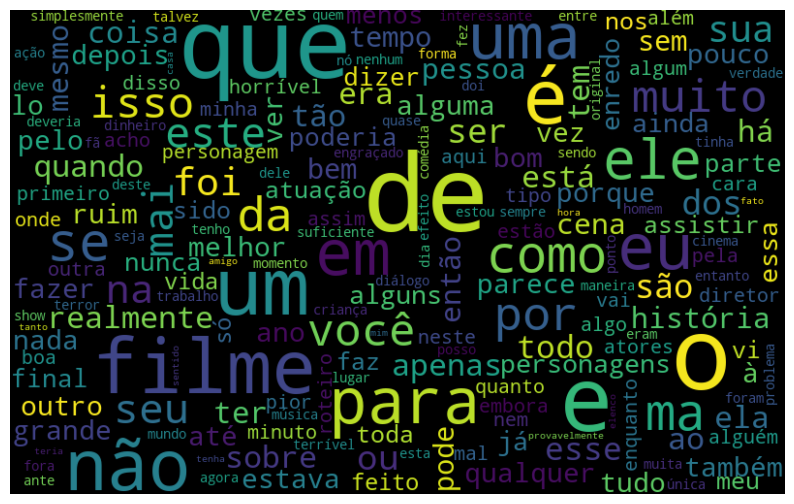

In [10]:
nuvem_palavras_neg(df, 'text_pt')

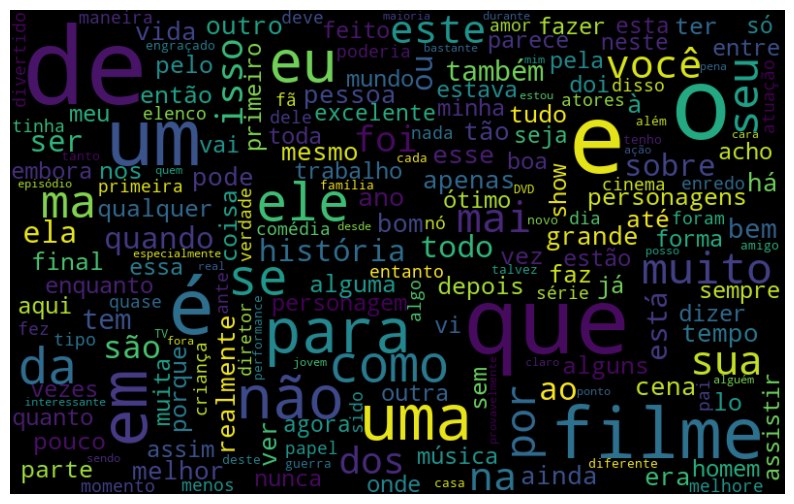

In [11]:
nuvem_palavras_pos(df, 'text_pt')

In [ ]:
#!pip install nltk
import nltk

nltk.download('all')

In [12]:
import nltk
from nltk import tokenize

frase = 'bem vindo ao mundo do PLN!'

token_espaco = tokenize.WhitespaceTokenizer()
    # separa as palavras entre os espaços
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


In [13]:
token_frase = token_espaco.tokenize(todas_palavras)
    # todas_palavras = string com todas as resenhas
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [15]:
df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
                            'Frequencia': list(frequencia.values())})
df_frequencia

,Palavra,Frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


In [16]:
df_frequencia.nlargest(columns = 'Frequencia', n = 10)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


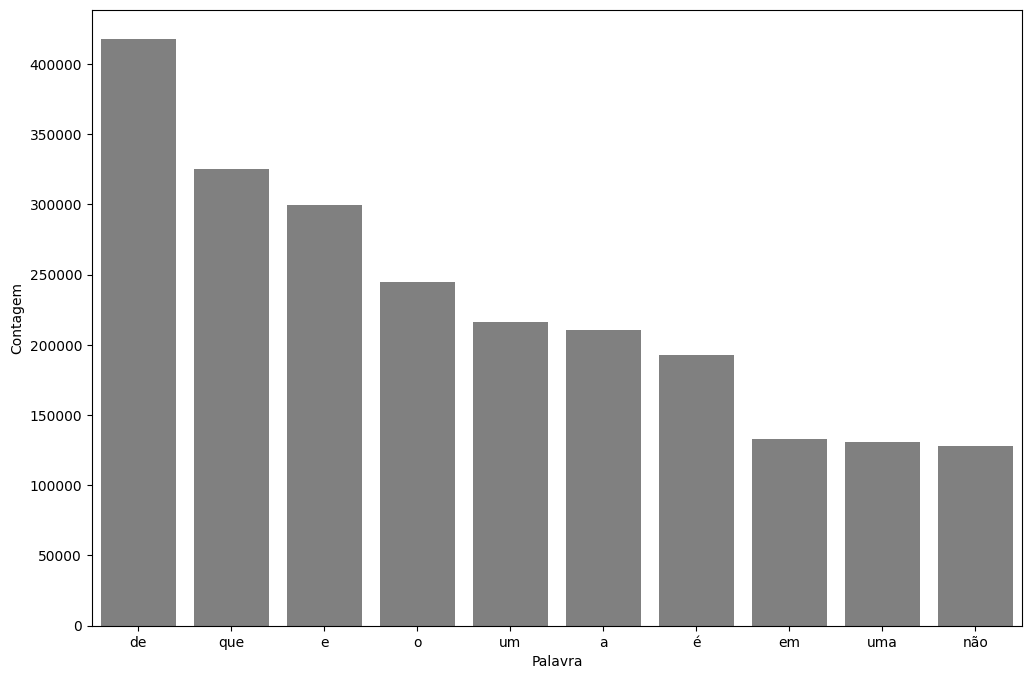

In [29]:
#!pip install seaborn
import seaborn as sns

df_frequencia = df_frequencia.nlargest(columns = 'Frequencia', n = 10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data = df_frequencia, x = 'Palavra', y = 'Frequencia', color = 'gray')
ax.set(ylabel='Contagem')
plt.show()

def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

In [24]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

frase_processada = list()

for opiniao in df.text_pt:
    frase = list()
    palavras_opiniao = token_espaco.tokenize(opiniao)
    for palavra in palavras_opiniao:
        if palavra not in palavras_irrelevantes:
            frase.append(palavra)
    frase_processada.append(' '.join(frase))

df['tratamento_1'] = frase_processada
df


,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."
...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1,"Como média votos baixa, fato funcionário locad..."
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1,O enredo algumas reviravoltas infelizes inacre...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1,Estou espantado forma filme maioria outros méd...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1,A Christmas Together realmente veio antes temp...


In [25]:
classificar_txt(df, 'tratamento_1', 'classificacao')

0.6811160533764659

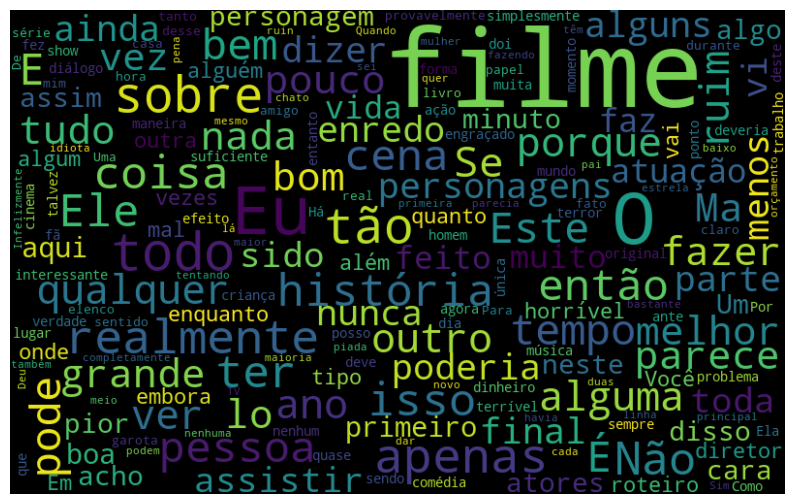

In [27]:
nuvem_palavras_neg(df, 'tratamento_1')

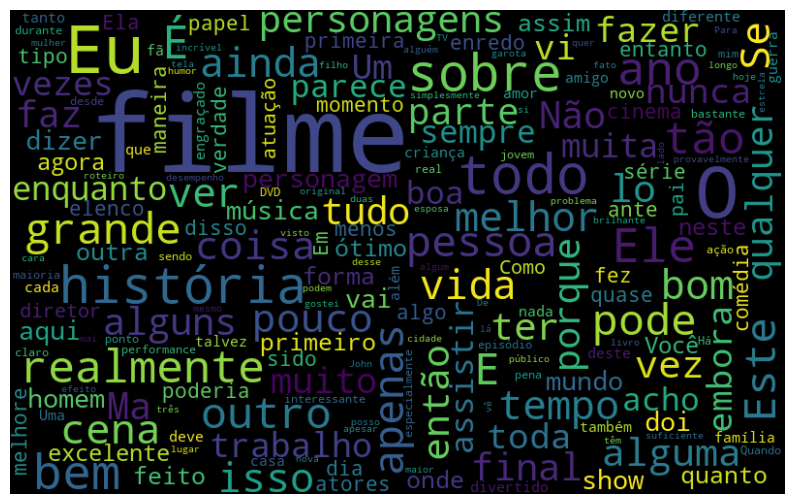

In [28]:
nuvem_palavras_pos(df, 'tratamento_1')

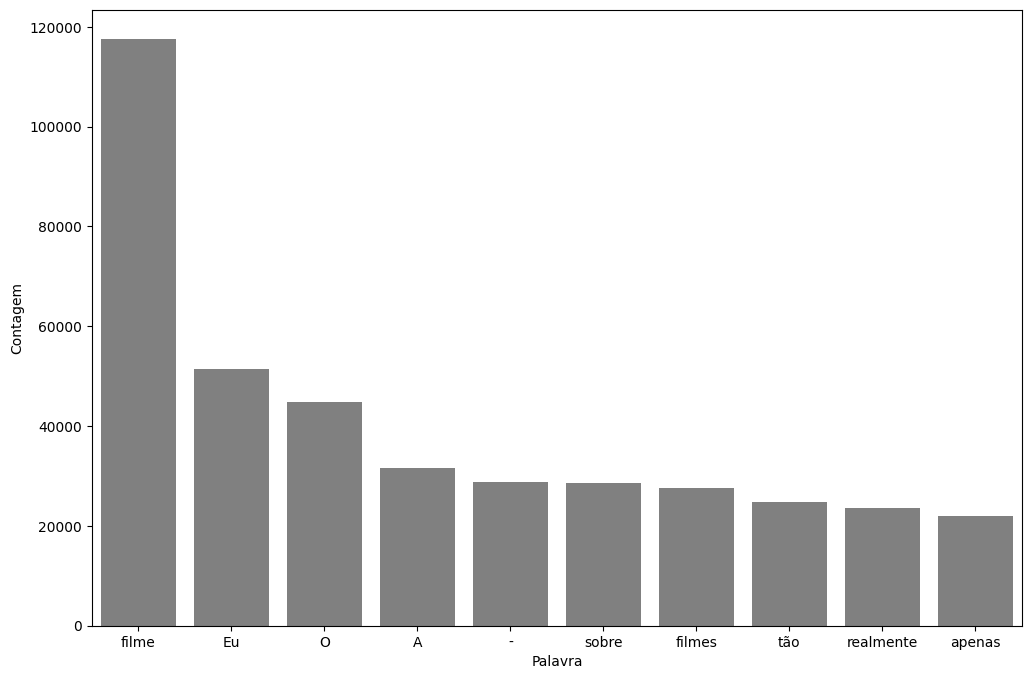

In [30]:
pareto(df, 'tratamento_1', 10)